In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
%matplotlib inline

In [3]:
heart = pd.read_csv('heart.csv')
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [25]:
heart.info() #no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
profile = ProfileReport(heart, title = "Heart Data Profile Report", explorative= True)

In [5]:
profile.to_file("report.html") #feels like cheating :|

In [8]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
#Looking for Correlations with the target

corr_matrix = heart.corr()
corr_matrix["target"].sort_values(ascending = False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

<AxesSubplot:>

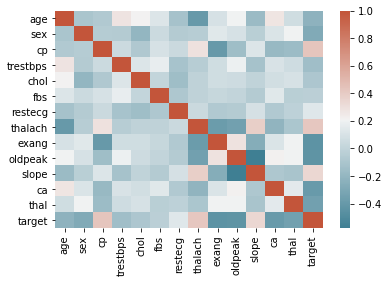

In [24]:
cmap = sns.diverging_palette(220, 20, as_cmap=True)

sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, cmap = cmap)

In [25]:
for col in ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]:
    print("Value Counts of ",col, " : ")
    print(heart[col].value_counts())
    print()

Value Counts of  sex  : 
1    207
0     96
Name: sex, dtype: int64

Value Counts of  cp  : 
0    143
2     87
1     50
3     23
Name: cp, dtype: int64

Value Counts of  fbs  : 
0    258
1     45
Name: fbs, dtype: int64

Value Counts of  restecg  : 
1    152
0    147
2      4
Name: restecg, dtype: int64

Value Counts of  exang  : 
0    204
1     99
Name: exang, dtype: int64

Value Counts of  slope  : 
2    142
1    140
0     21
Name: slope, dtype: int64

Value Counts of  ca  : 
0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

Value Counts of  thal  : 
2    166
3    117
1     18
0      2
Name: thal, dtype: int64



<AxesSubplot:xlabel='target', ylabel='count'>

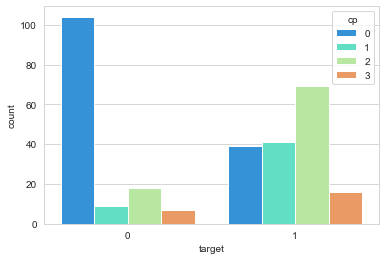

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='target', hue= 'cp', data = heart, palette = 'rainbow')

<AxesSubplot:xlabel='chol', ylabel='Count'>

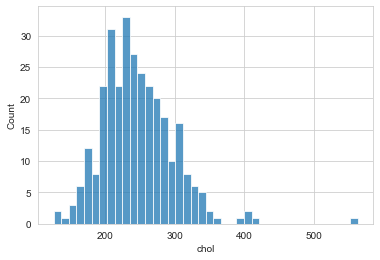

In [29]:
sns.histplot(heart['chol'], bins=40)

<AxesSubplot:xlabel='age', ylabel='Count'>

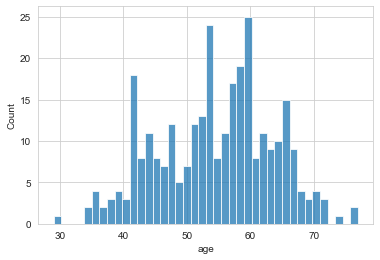

In [21]:
sns.histplot(heart['age'], bins = 40)

<AxesSubplot:xlabel='target', ylabel='count'>

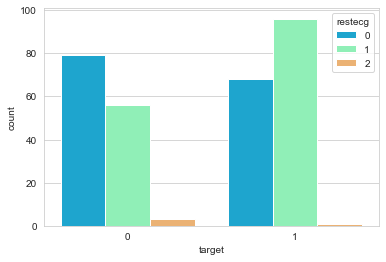

In [37]:
sns.set_style('whitegrid')
sns.countplot(x='target', hue= 'restecg', data = heart, palette = 'rainbow')

<AxesSubplot:xlabel='target', ylabel='count'>

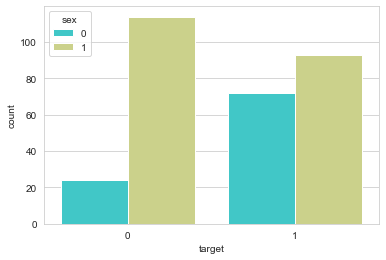

In [38]:
sns.set_style('whitegrid')
sns.countplot(x='target', hue= 'sex', data = heart, palette = 'rainbow')

<AxesSubplot:xlabel='target', ylabel='count'>

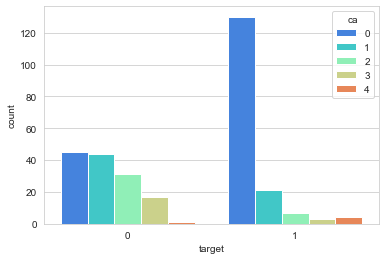

In [39]:
sns.set_style('whitegrid')
sns.countplot(x='target', hue= 'ca', data = heart, palette = 'rainbow')

<AxesSubplot:xlabel='target', ylabel='count'>

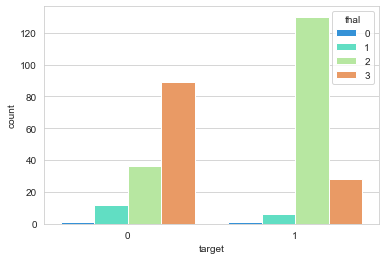

In [40]:
sns.set_style('whitegrid')
sns.countplot(x='target', hue= 'thal', data = heart, palette = 'rainbow')